# Gain scheduling and Auto Tuning
In this laboratory experiment the topics auto-tuning and gain scheduling are studied.
## Preparation
Study the instructions for the laboratory experiment given here as well as the relevan chapters in the course book.

## The processes
The processes studied in this session are second order systems with two poles in $s=-0.5$
$$G_1(s) = \dfrac{1}{(2s+1)^2}$$
and the same system with a time delay of 4 seconds
$$G_2(s) = G_1(s)e^{-4s}$$

## Installation
The following code only has to be run once, it installs the relevant packages.

In [1]:
if false
    Pkg.add("GR")
    Pkg.add("ControlSystems")
    Pkg.checkout("ControlSystems","gainscheduling")
    Pkg.clone("https://github.com/JuliaGizmos/WebIO.jl")
    Pkg.checkout("Observables")
    Pkg.clone("https://github.com/JuliaGizmos/Vue.jl")
    Pkg.clone("https://github.com/JuliaGizmos/CSSUtil.jl")
    Pkg.clone("https://github.com/JuliaGizmos/InteractNext.jl")
end

INFO: Package GR is already installed
INFO: METADATA is out-of-date — you may not have the latest version of GR
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package ControlSystems is already installed
INFO: METADATA is out-of-date — you may not have the latest version of ControlSystems
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Checking out ControlSystems gainscheduling...


LoadError: [91mControlSystems is dirty, bailing[39m

The code below must be run once every time the kernel is restarted

In [2]:
using WebIO
WebIO.devsetup()
WebIO.bundlejs(watch=false)
using ControlSystems, OrdinaryDiffEq, InteractNext
gr(show=false, size=(800,400)) # Set defaults for plotting

HTML{String}("<script>/******/ (function(modules) { // webpackBootstrap\n/******/ \t// The module cache\n/******/ \tvar installedModules = {};\n/******/\n/******/ \t// The require function\n/******/ \tfunction __webpack_require__(moduleId) {\n/******/\n/******/ \t\t// Check if module is in cache\n/******/ \t\tif(installedModules[moduleId]) {\n/******/ \t\t\treturn installedModules[moduleId].exports;\n/******/ \t\t}\n/******/ \t\t// Create a new module (and put it into the cache)\n/******/ \t\tvar module = installedModules[moduleId] = {\n/******/ \t\t\ti: moduleId,\n/******/ \t\t\tl: false,\n/******/ \t\t\texports: {}\n/******/ \t\t};\n/******/\n/******/ \t\t// Execute the module function\n/******/ \t\tmodules[moduleId].call(module.exports, module, module.exports, __webpack_require__);\n/******/\n/******/ \t\t// Flag the module as loaded\n/******/ \t\tmodule.l = true;\n/******/\n/******/ \t\t// Return the exports of the module\n/******/ \t\treturn module.exports;\n/******/ \t}\n/******/\n/******/\n/******/ \t// expose the modules object (__webpack_modules__)\n/******/ \t__webpack_require__.m = modules;\n/******/\n/******/ \t// expose the module cache\n/******/ \t__webpack_require__.c = installedModules;\n/******/\n/******/ \t// identity function for calling harmony imports with the correct context\n/******/ \t__webpack_require__.i = function(value) { return value; };\n/******/\n/******/ \t// define getter function for harmony exports\n/******/ \t__webpack_require__.d = function(exports, name, getter) {\n/******/ \t\tif(!__webpack_require__.o(exports, name)) {\n/******/ \t\t\tObject.defineProperty(exports, name, {\n/******/ \t\t\t\tconfigurable: false,\n/******/ \t\t\t\tenumerable: true,\n/******/ \t\t\t\tget: getter\n/******/ \t\t\t});\n/******/ \t\t}\n/******/ \t};\n/******/\n/******/ \t// getDefaultExport function for compatibility with non-harmony modules\n/******/ \t__webpack_require__.n = function(module) {\n/******/ \t\tvar getter = module && module.__esModule ?\n/******/ \t\t\tfunction getDefault() { return module['default']; } :\n/******/ \t\t\tfunction getModuleExports() { return module; };\n/******/ \t\t__webpack_require__.d(getter, 'a', getter);\n/******/ \t\treturn getter;\n/******/ \t};\n/******/\n/******/ \t// Object.prototype.hasOwnProperty.call\n/******/ \t__webpack_require__.o = function(object, property) { return Object.prototype.hasOwnProperty.call(object, property); };\n/******/\n/******/ \t// __webpack_public_path__\n/******/ \t__webpack_require__.p = \"\";\n/******/\n/******/ \t// Load entry module and return exports\n/******/ \treturn __webpack_require__(__webpack_require__.s = 3);\n/******/ })\n/************************************************************************/\n/******/ ([\n/* 0 */\n/***/ (function(module, exports, __webpack_require__) {\n\nvar is_array = __webpack_require__(8)\nvar arrays_equal = __webpack_require__(4)\n\nfunction arrays_and_equal(arr1, arr2){\n    return is_array(arr1) && is_array(arr2) && arrays_equal(arr1, arr2)\n}\n\nvar contexts = {};\nvar obscontexts = {};\n\nfunction makeWidget(id, data, sendCallback, dom, handlers, observables)\n{\n    var ctx = {\n        type: \"context\",\n        id: id,\n        data: data,\n        sendCallback: sendCallback,\n        dom: dom,\n        handlers: handlers || {},\n        observables: observables || {},\n        promises: {}\n    }\n\n    contexts[id] = ctx;\n    if (observables){\n        Object.keys(observables).forEach(function setobscontext(name){\n            var o = observables[name]\n            if (typeof obscontexts[o.id] === \"undefined\"){\n                obscontexts[o.id] = []\n            }\n            //obname is the name of the observable in this context\n            obscontexts[o.id].push({ctx: ctx, obname: name})\n        })\n    }\n\n    return ctx;\n}\n\n\nfunction createNode(context, data, parentNode)\n{\n    var nodeType = data.nodeType;\n    return WebIO.NodeTypes[nodeType]\n           .create(context, data, 

HTML{String}("<script>(function (IPython, \$, WebIO) {\n\n    function initComm(notebook)\n    {\n        var commManager = notebook.kernel.comm_manager;\n\n        // Register a \"target\" so that Julia can create a Comm\n        // to communicate.\n        commManager.register_target(\"webio_comm\",\n            function (comm) {\n                WebIO.triggerConnected();\n                WebIO.sendCallback = function (msg) { comm.send(msg); }\n                comm.on_msg(function (msg) {\n                    WebIO.dispatch(msg.content.data);\n                });\n            }\n        );\n    }\n\n    \$(document).ready(function() {\n\n        try {\n            // try to initialize right away - note: \$.ready is async.\n            initComm(IPython.notebook);\n        } catch (e) {\n            // wait on the status_started event.\n            \$([IPython.events]).on(\n                'kernel_created.Kernel kernel_created.Session',\n                 function(event, notebook) { initComm(notebook); }\n            );\n        }\n    });\n\n})(IPython, jQuery, WebIO);\n</script>")

WebIO: setting up ijulia
yarn-v1.1.0/bin/
yarn-v1.1.0/bin/yarn.js
yarn-v1.1.0/bin/yarn
yarn-v1.1.0/bin/yarnpkg
yarn-v1.1.0/bin/yarn.cmd
yarn-v1.1.0/bin/yarnpkg.cmd
yarn-v1.1.0/lib/
yarn-v1.1.0/lib/cli.js
yarn-v1.1.0/lib/v8-compile-cache.js
yarn-v1.1.0/LICENSE
yarn-v1.1.0/package.json
yarn-v1.1.0/README.md
yarn install v1.1.0
[1/4] Resolving packages...
success Already up-to-date.
Done in 0.34s.
Hash: 72bb344ae93d31f2ce31
Version: webpack 2.7.0
Time: 243ms
          Asset    Size  Chunks             Chunk Names
webio.bundle.js  127 kB       0  [emitted]  WebIO
   [0] ./basics/webio.js 6.72 kB {0} [built]
   [1] (webpack)/buildin/global.js 509 bytes {0} [built]
   [2] ./basics/node.js 8.72 kB {0} [built]
   [3] ./index.js 74 bytes {0} [built]
   [4] ./~/array-equal/index.js 216 bytes {0} [built]
   [5] ./~/base64-js/index.js 3.47 kB {0} [built]
   [6] ./~/buffer/index.js 48.6 kB {0} [built]
   [7] ./~/ieee754/index.js 2.05 kB {0} [built]
   [8] ./~/is-array/index.js 470 bytes {0} [built]

Plots.GRBackend()

We now proceed to define the process model and some parameters for our simulation

In [3]:
P              = tf(1,[2.,1])^2  # Process model
h              = 0.1             # Sample time (only used for plots)
Tf             = 20              # Length of experiments (seconds)
t              = 0:h:Tf          # Time vector
Ps             = ss(P)           # State-space representation of process model
reference(t,x) = 1.;             # Reference generator (step function)

Next we define a simulation object and simulate the system with a P-controller. Change the value of the gain $K$ using the slider and try to get a feelig for how the system behaves.

In [11]:
s      = Simulator(Ps)
x0     = [0.,0] # Initial state
tspan  = (0.0,Tf)

@manipulate for K = linspace(0,20,50)
    global os, sol1
    os     = OutputFeedbackSimulator(Ps,reference,e->K*e)
    sol1   = solve(os, x0, tspan, Tsit5()) # Simulate the system
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

(div
  (div)
  (WebIO.Widget("context-25", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_22", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"

Let's step up the game and control the system with a PI controller. Try to tune the parameters to get a fast and well-damped step response.

In [12]:
conditions  = [(x,y,r) -> true]
tspan       = (0.0,Tf)
x0          = [0.,0]

@manipulate for kp = slider(linspace(0,20,50), label="kp", value=5), ki = slider(linspace(0,20,50), label="ki", value=1)
    controllers = [pid(kp=kp, ki=ki)]
    global gs, sol1, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!(t, gs.y(t, sol2)[:], lab="PI controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

(div
  (div)
  (div)
  (WebIO.Widget("context-30", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_26", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" 

We now introduce gain scheduling. The following code defines two controllers and a vector of conditions that determine when to switch between the controllers. The switching conditions are allowed to be arbitrary functions of the state $x$, the output $y$ or the reference $r$. The template below implements a schedule based on a simple threshold value on the output, $y=th$. Experiment with the controller parameters of the two controllers and the scheduling signal. Anser the following questions
- Which signal is best for scheduling?
- Can you implement a controller which is both faster and has better damping than your best controller from the previous task?

In [13]:
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=5),
                ki1 = slider(linspace(0,20,50), label="ki1", value=1),
                kp2 = slider(linspace(0,20,50), label="kp2", value=5),
                ki2 = slider(linspace(0,20,50), label="ki2", value=1),
                th  = linspace(0,1,20)
    
    global gs
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!(t, gs.y(t, sol2)[:], lab="PI controller")

    controllers  = [pid(kp=kp1, ki=ki1), pid(kp=kp2, ki=ki2)]
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol3         = solve(gs2, x0, tspan, Tsit5(), reltol=1e-2, abstol=1e-2)
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(0,1.5))
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-39", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_33", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<polyline cli

Okay, now it's time to make it a bit harder. We now add a nonlinearity to the process input. We can play around a bit with the type of the nonlinearity, but let's start with
$$u = u_i^2 \quad \text{if}\quad  u_i > 0.5$$
$$u = 0.1u_i \quad \text{otherwise}$$
depicted below.

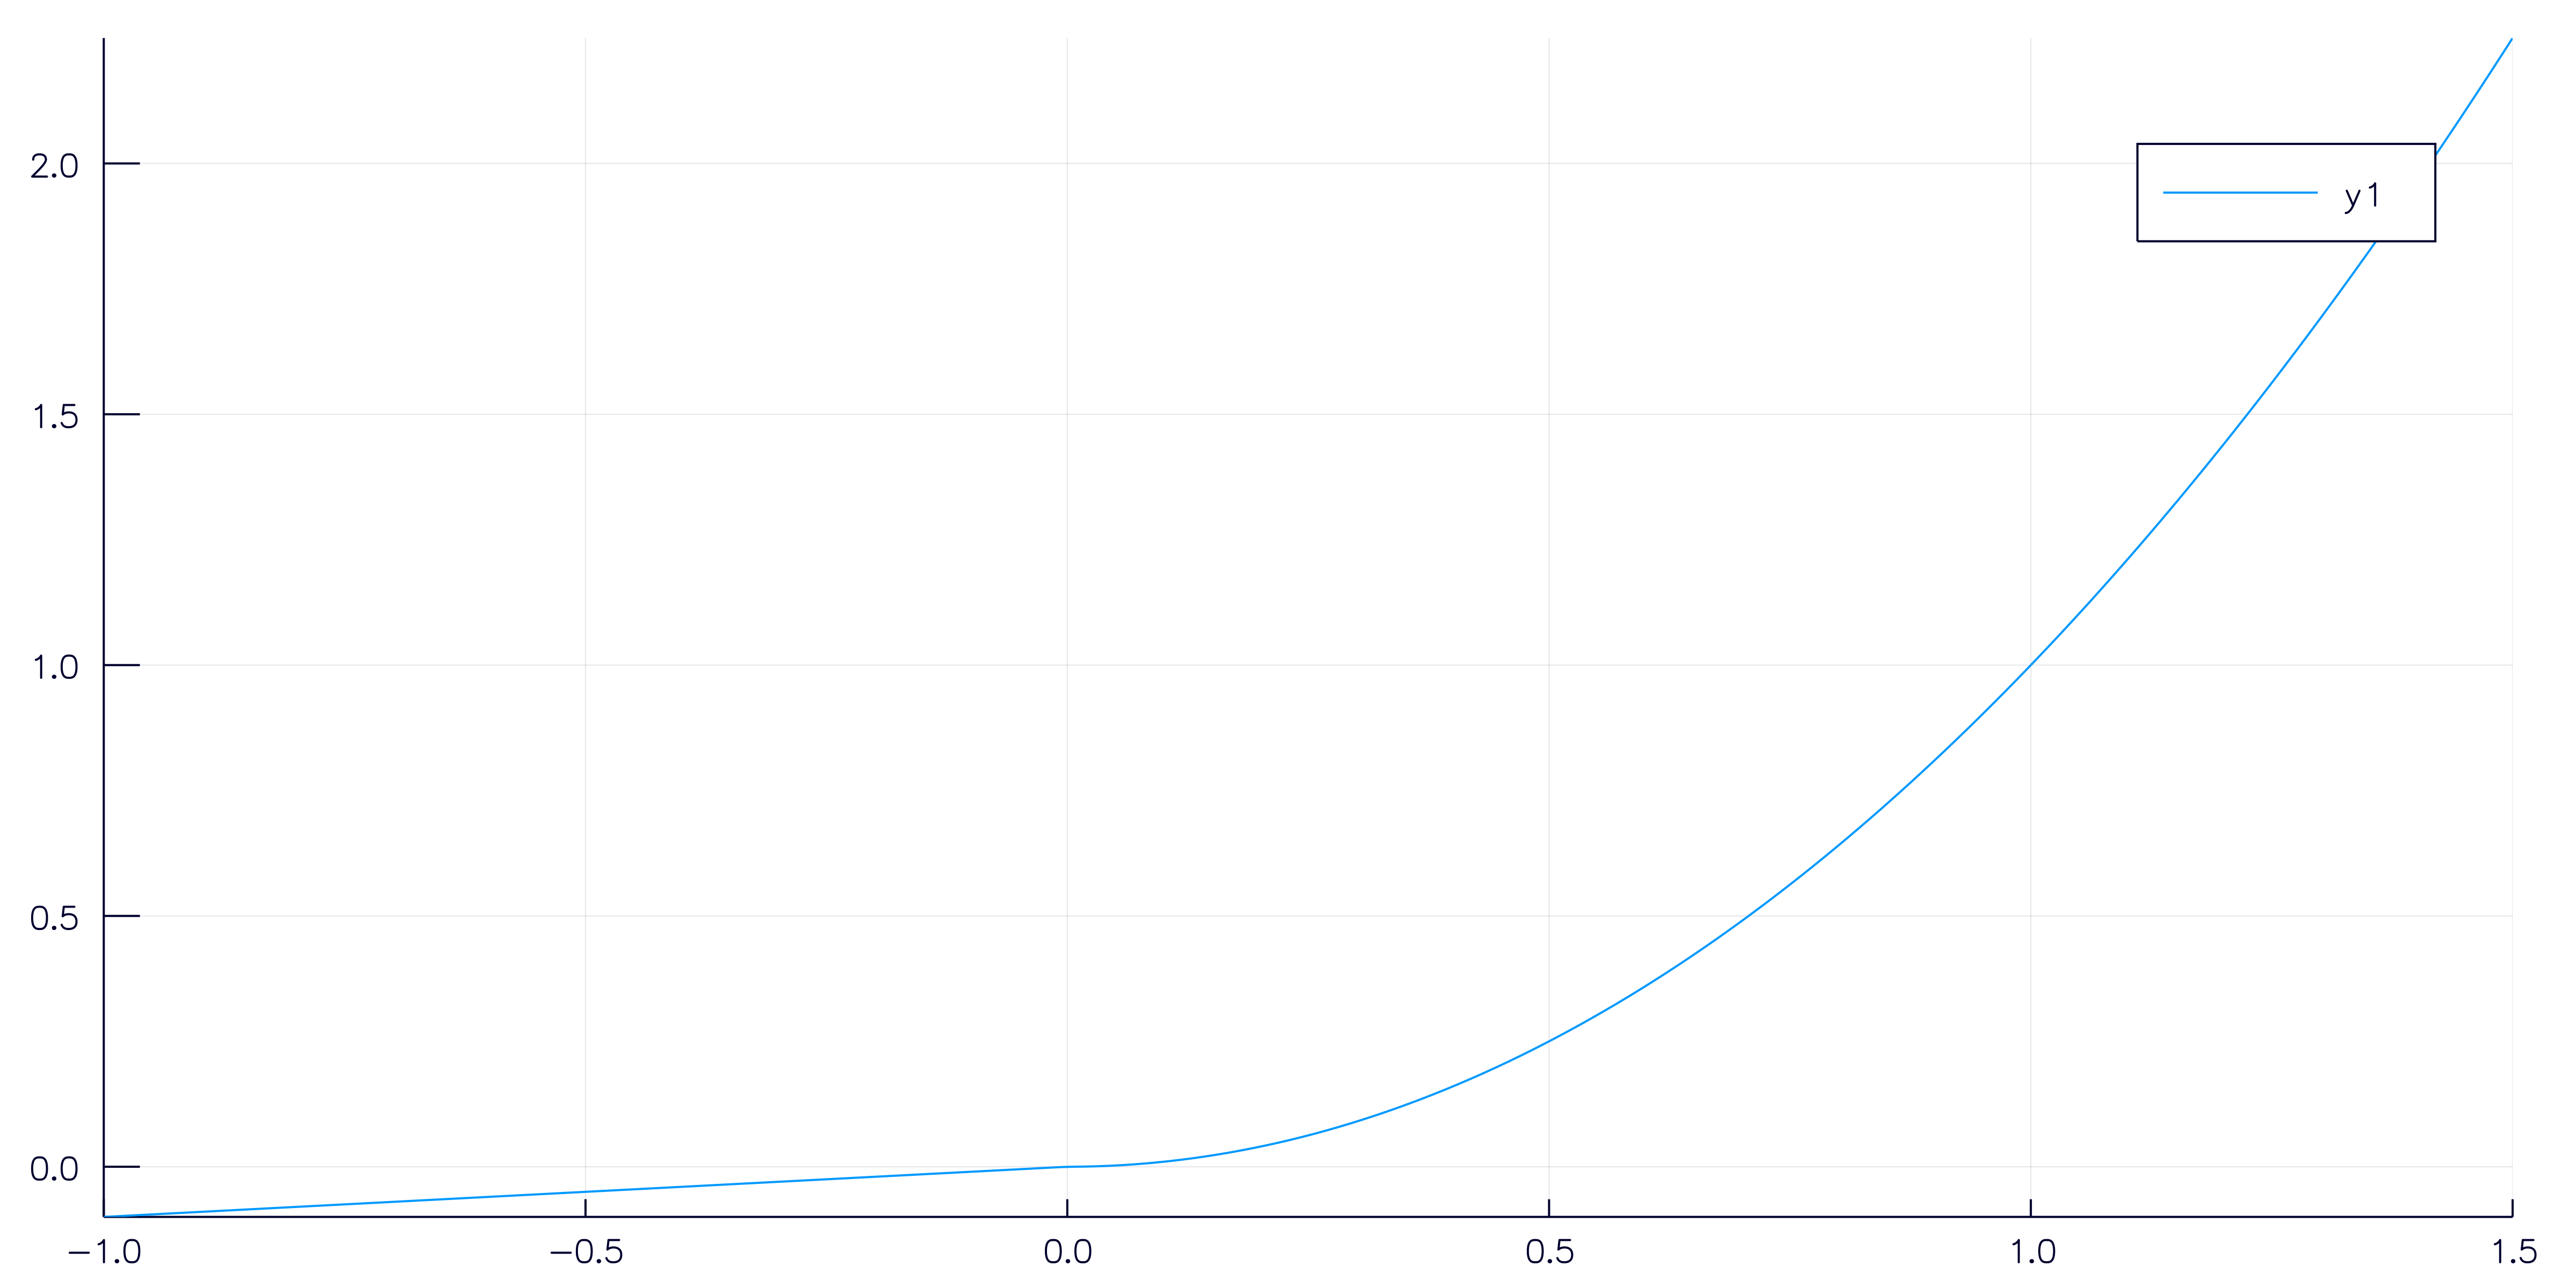

In [56]:
nonlinearity(u) = u < 0 ? 0.1u : u^2
plot(linspace(-1,1.5,200),nonlinearity)

Try tuning a P-controller for the system with the input nonlinearity. Is it possible to achieve an okay result?

In [65]:
tspan = (0.,30.)
t = 0:h:30
x0 = [0,2.]
conditions  = [(x,y,r) -> true]
reference(t,x) = t < 15 ? 0. : 1.
@manipulate for kp = slider(linspace(0,20,50), label="kp", value=5), ki = slider(linspace(0,20,50), label="ki", value=1)
    controllers = [pid(kp=kp, ki=ki)]
    global gs, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=u->nonlinearity.(u))
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, gs.y(t, sol2)[:], lab="PI controller")
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5))
end

(div
  (div)
  (div)
  (WebIO.Widget("context-251", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_168", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 780.315,377.923 780.315,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"742\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  286.201,377.923 286.201,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  533.258,377.923 533.258,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,286.395 780.315,286.395 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,194.867 780.315,194.867 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,103.339 780.315,103.339 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  286.201,377.923 286.201,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  533.258,377.923 533.258,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 50.2612,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,286.395 50.2612,286.395 \n  \"/>\n<polyline clip-path=\"url(#clip00)

Once again, we try a controller with gain scheduling. The left plot displays the control signal of the two controllers.

In [99]:
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=2),
                ki1 = slider(linspace(0,20,50), label="ki1", value=1),
                kp2 = slider(linspace(0,10,50), label="kp2", value=2),
                ki2 = slider(linspace(0,20,50), label="ki2", value=1),
                th  = linspace(0,1,20)
    
    # kp1,ki1,kp2,ki2,th = 1,1,1,1,0.5
    global gs, sol3
    plot(t, gs.y(t, sol2)[:], lab="PI controller", layout=2)

    controllers  = ss.([pid(kp=kp1, ki=ki1), pid(kp=kp2, ki=ki2)])
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=u->nonlinearity.(u))
    sol3         = solve(gs2, x0, tspan, Tsit5(), reltol=1e-4, abstol=1e-4)

    U = hcat(sol3.u...)
    x = [[u[1],u[2]] for u in sol3.u]

    u1 = controllers[1].C*U[3,:]' + controllers[1].D.*hcat((gs2.e.(sol3.t, x))...)
    u2 = controllers[2].C*U[4,:]' + controllers[2].D.*hcat((gs2.e.(sol3.t, x))...)
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(0,1.5), subplot=1)
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5), subplot=1)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash, subplot=1)
    plot!([u1[:] u2[:]], lab=["u_1" "u_2"], subplot=2)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-314", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_219", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 385.257,377.923 385.257,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"347\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  154.515,377.923 154.515,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  269.886,377.923 269.886,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  385.257,377.923 385.257,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,286.395 385.257,286.395 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,194.867 385.257,194.867 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,103.339 385.257,103.339 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 385.257,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  154.515,377.923 154.515,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  269.886,377.923 269.886,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  385.257,377.923 385.257,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 44.3353,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,286.395 44.3353,286.395 \n  \"/>\n<polyline 

DimensionMismatch: [91mDimensionMismatch("A has dimensions (1,0) but B has dimensions (1,65)")[39m

- Can you manage to get a gain scheduled controller that is better than the simple PI controller?
- Do you notice any issues with the implementation of the gain scheduling?
- How do you resolve any issues you can think of? 

Tuning a gain schedule and the parameters of the scheduled controllers can become very tedious. Even more so it the process time constant is long and one does not have a simulator. A more systematic apporach is to linearize the system around two different operating points and design a well-damped controller for both linear systems. One then chooses a threshold somewhere between the operating points. Linearize the system around two operating points, you can do this either manually or with the help of the computer. The process model on statespace form is given by:

In [100]:
Ps

StateSpace:
A = 
          x1      x2 
  x1   -1.0    -0.5  
  x2    0.5     0.0  
B = 
         u1 
  x1   1.0  
  x2   0.0  
C = 
         x1     x2 
  y1   0.0    0.5  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model